---
# <span style='color:#2a54b2;font-family:Verdana'><center><b>3. CDC - Inquietante Hallazgo
---

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Algo decepcionados por la baja calidad de los datos que encontramos en España, partimos rumbo a Estados Unidos, con la esperanza de encontrar algo mejor. Y lo cierto es que así ha sido.<br>
El dataset que analizaremos en este notebook discrimina por causa de muerte, lo que nos permitirá poner el foco en algunas de las dolencias que se están asociando a la vacunación de la COVID-19, aunque la gran mayoría de ellas no están especificadas.<br><br>
Por otra parte, este dataset no discrimina por rango de edad (pero ya llegaremos a eso), y no dispone de una estadística de muertes esperadas, que nos ha sido muy útil al analizar el dataset del MoMo, pero sin embargo nos deparará grandes sorpresas.<br>
Sin duda, éste notebok y el siguiente son los más importantes del proyecto, y los más sorprendentes. De momento, puedo adelantar que aquí no he encontrado lo que esperaba encontrar, pero he dado con algo mucho más inquietante, que desde luego no imaginaba...

---
En este notebook voy a utilizar el dataset **Weekly Provisional Counts of Deaths by State and Select Causes, 2020-2021**, que puede descargarse desde el siguiente enlace:  
https://data.cdc.gov/NCHS/Weekly-Provisional-Counts-of-Deaths-by-State-and-S/muzy-jte6

<img src="input/logos/cdc_logo.jpeg" width=350 height=350 />

Detalle de las columnas que voy a utilizar (con los nombres que tendrán una vez renombradas, ya que los nombres originales son muy largos):
- **Jurisdiction** - Especifica si el ámbito es nacional o estatal.
- **Year** - Año del fallecimiento.
- **Week** - Semana del fallecimiento.
- **All_Cause** - Número de defunciones por todas las causas.
- **Natural_Cause** - Número de defunciones por causas naturales.
- **Septicemia** - Número de defunciones por Septicemia.
- **Malignant_Neoplasms** - Número de defunciones por Cancer.
- **Diabetes_Mellitus** - Número de defunciones por Diabetes Mellitus.
- **Alzheimer** - Número de defunciones por Alzheimer.
- **Influenza_Pneumonia** - Número de defunciones por Gripe y Neumonía.
- **Lower_Resp_Diseases** - Número de defunciones por Enfermedades Respiratorias crónicas.
- **Other_Resp_Diseases** - Número de defunciones por otras Enfermedades Respiratorias.
- **Nephritis_Nephrosis** - Número de defunciones por Nefritis, Síndrome Nefrótico y Nefrosis.
- **Abnormal_Symptoms** - Número de defunciones por Síntomas, Signos y Hallazgos Clínicos Anormales, no clasificados.
- **Heart_Diseases** - Número de defunciones por Ataques al Corazón.
- **Cerebrovascular_Diseases** - Número de defunciones por Enfermedades Cerebrovasculares.
- **COVID-19_Multiple** - Número de defunciones por COVID-19, como causa múltiple.
- **COVID-19_Underlying** - Número de defunciones por COVID-19, como causa subyacente.
---

In [1]:
# Importo las librerías que voy a utilizar:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sbrn
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
# Deshabilito el "chained_assignment", para que no devuelva warnings en algunas modificaciones de columnas:
pandas.set_option('chained_assignment', None)

Importo el archivo CSV:

In [3]:
cdc_df = pandas.read_csv('./input/CDC/Weekly_Provisional_Counts_of_Deaths_by_State_and_Select_Causes__2020-2021.csv')

cdc_df

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,01/26/2022,United States,2020,1,2020-01-04,60173.0,55007,843.0,11569.0,1829.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/26/2022,United States,2020,2,2020-01-11,60741.0,55758,861.0,11962.0,1941.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/26/2022,United States,2020,3,2020-01-18,59360.0,54515,829.0,11702.0,1819.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/26/2022,United States,2020,4,2020-01-25,59158.0,54396,828.0,11879.0,1864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/26/2022,United States,2020,5,2020-02-01,58827.0,53996,811.0,11963.0,1828.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5773,01/26/2022,Puerto Rico,2021,50,2021-12-18,592.0,556,12.0,81.0,66.0,...,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9)
5774,01/26/2022,Puerto Rico,2021,51,2021-12-25,561.0,528,13.0,89.0,60.0,...,NaN,NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN,NaN,Suppressed (counts 1-9),Suppressed (counts 1-9)
5775,01/26/2022,Puerto Rico,2021,52,2022-01-01,477.0,450,10.0,57.0,48.0,...,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN,NaN
5776,01/26/2022,Puerto Rico,2022,1,2022-01-08,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Elimino las columnas que no voy a utilizar, y renombro casi todas las restantes, porque muchos nombres son muy largos, y contienen espacios:

In [4]:
# Elimino las columnas que no voy a utilizar:
cdc_df.drop(['Data As Of','Week Ending Date','flag_allcause','flag_natcause','flag_sept','flag_neopl','flag_diab','flag_alz','flag_inflpn','flag_clrd',
             'flag_otherresp','flag_nephr','flag_otherunk','flag_hd','flag_stroke','flag_cov19mcod','flag_cov19ucod'], axis='columns', inplace=True)

# Renombro casi todas las columnas restantes:
cdc_df.rename(columns={'Jurisdiction of Occurrence':'Jurisdiction', 'MMWR Year':'Year', 'All Cause':'All_Cause', 'Natural Cause':'Natural_Cause', 'MMWR Week':'Week', 'Septicemia (A40-A41)':'Septicemia',
                       'Malignant neoplasms (C00-C97)':'Malignant_Neoplasms', 'Diabetes mellitus (E10-E14)':'Diabetes_Mellitus', 'Alzheimer disease (G30)':'Alzheimer', 'Influenza and pneumonia (J09-J18)':'Influenza_Pneumonia',
                        'Chronic lower respiratory diseases (J40-J47)':'Lower_Resp_Diseases', 'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)':'Other_Resp_Diseases',
                        'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)':'Nephritis_Nephrosis',
                        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Abnormal_Symptoms',
                        'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Heart_Diseases', 'Cerebrovascular diseases (I60-I69)':'Cerebrovascular_Diseases',
                        'COVID-19 (U071, Multiple Cause of Death)':'COVID-19_Multiple', 'COVID-19 (U071, Underlying Cause of Death)':'COVID-19_Underlying'}, inplace=True)
cdc_df

,Jurisdiction,Year,Week,All_Cause,Natural_Cause,Septicemia,Malignant_Neoplasms,Diabetes_Mellitus,Alzheimer,Influenza_Pneumonia,Lower_Resp_Diseases,Other_Resp_Diseases,Nephritis_Nephrosis,Abnormal_Symptoms,Heart_Diseases,Cerebrovascular_Diseases,COVID-19_Multiple,COVID-19_Underlying
0,United States,2020,1,60173.0,55007,843.0,11569.0,1829.0,2537.0,1559.0,3501.0,1067.0,1094.0,629.0,14202.0,3110.0,0.0,0.0
1,United States,2020,2,60741.0,55758,861.0,11962.0,1941.0,2566.0,1528.0,3710.0,1035.0,1092.0,649.0,13913.0,3188.0,1.0,1.0
2,United States,2020,3,59360.0,54515,829.0,11702.0,1819.0,2491.0,1484.0,3526.0,992.0,1121.0,610.0,13593.0,3256.0,2.0,1.0
3,United States,2020,4,59158.0,54396,828.0,11879.0,1864.0,2517.0,1488.0,3403.0,979.0,1107.0,637.0,13610.0,3185.0,2.0,1.0
4,United States,2020,5,58827.0,53996,811.0,11963.0,1828.0,2480.0,1411.0,3313.0,981.0,1074.0,613.0,13463.0,3084.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5773,Puerto Rico,2021,50,592.0,556,12.0,81.0,66.0,41.0,20.0,13.0,NaN,15.0,18.0,116.0,24.0,10.0,NaN
5774,Puerto Rico,2021,51,561.0,528,13.0,89.0,60.0,49.0,12.0,NaN,NaN,16.0,17.0,114.0,25.0,NaN,NaN
5775,Puerto Rico,2021,52,477.0,450,10.0,57.0,48.0,31.0,19.0,11.0,NaN,20.0,18.0,89.0,27.0,22.0,17.0
5776,Puerto Rico,2022,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Compruebo los **tipos de datos**:

In [5]:
cdc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5778 entries, 0 to 5777
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Jurisdiction              5778 non-null   object 
 1   Year                      5778 non-null   int64  
 2   Week                      5778 non-null   int64  
 3   All_Cause                 5777 non-null   float64
 4   Natural_Cause             5778 non-null   int64  
 5   Septicemia                3321 non-null   float64
 6   Malignant_Neoplasms       5765 non-null   float64
 7   Diabetes_Mellitus         4534 non-null   float64
 8   Alzheimer                 4821 non-null   float64
 9   Influenza_Pneumonia       3439 non-null   float64
 10  Lower_Resp_Diseases       4931 non-null   float64
 11  Other_Resp_Diseases       3408 non-null   float64
 12  Nephritis_Nephrosis       3630 non-null   float64
 13  Abnormal_Symptoms         3414 non-null   float64
 14  Heart_Di

Compruebo que no hay **valores null** en los registros correspondientes a todo el pais:

In [6]:
cdc_df.query("Jurisdiction == 'United States'").isna().sum()

Jurisdiction                0
Year                        0
Week                        0
All_Cause                   0
Natural_Cause               0
Septicemia                  0
Malignant_Neoplasms         0
Diabetes_Mellitus           0
Alzheimer                   0
Influenza_Pneumonia         0
Lower_Resp_Diseases         0
Other_Resp_Diseases         0
Nephritis_Nephrosis         0
Abnormal_Symptoms           0
Heart_Diseases              0
Cerebrovascular_Diseases    0
COVID-19_Multiple           0
COVID-19_Underlying         0
dtype: int64

Creo un nuevo dataframe, solo con los registros de **ámbito nacional**:

In [7]:
cdc_country = cdc_df.query("Jurisdiction == 'United States'")

cdc_country

,Jurisdiction,Year,Week,All_Cause,Natural_Cause,Septicemia,Malignant_Neoplasms,Diabetes_Mellitus,Alzheimer,Influenza_Pneumonia,Lower_Resp_Diseases,Other_Resp_Diseases,Nephritis_Nephrosis,Abnormal_Symptoms,Heart_Diseases,Cerebrovascular_Diseases,COVID-19_Multiple,COVID-19_Underlying
0,United States,2020,1,60173.0,55007,843.0,11569.0,1829.0,2537.0,1559.0,3501.0,1067.0,1094.0,629.0,14202.0,3110.0,0.0,0.0
1,United States,2020,2,60741.0,55758,861.0,11962.0,1941.0,2566.0,1528.0,3710.0,1035.0,1092.0,649.0,13913.0,3188.0,1.0,1.0
2,United States,2020,3,59360.0,54515,829.0,11702.0,1819.0,2491.0,1484.0,3526.0,992.0,1121.0,610.0,13593.0,3256.0,2.0,1.0
3,United States,2020,4,59158.0,54396,828.0,11879.0,1864.0,2517.0,1488.0,3403.0,979.0,1107.0,637.0,13610.0,3185.0,2.0,1.0
4,United States,2020,5,58827.0,53996,811.0,11963.0,1828.0,2480.0,1411.0,3313.0,981.0,1074.0,613.0,13463.0,3084.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,United States,2021,50,65139.0,61907,776.0,10869.0,1847.0,2260.0,905.0,2733.0,900.0,1017.0,3464.0,12550.0,3088.0,9451.0,8655.0
103,United States,2021,51,64088.0,61220,751.0,10820.0,1702.0,2332.0,933.0,2765.0,870.0,1017.0,3517.0,12400.0,3001.0,9342.0,8504.0
104,United States,2021,52,61799.0,59302,727.0,10048.0,1733.0,2171.0,936.0,2655.0,815.0,1031.0,3656.0,11860.0,2842.0,9688.0,8771.0
105,United States,2022,1,51371.0,50056,555.0,7964.0,1324.0,1844.0,759.0,2307.0,690.0,798.0,3439.0,10004.0,2257.0,9694.0,8712.0


Hago una agrupación en base a la columna **Year** (con la función **sum**), para comprobar la cantidad de muertes por año, en cada causa de fallecimiento:

In [8]:
cdc_country.groupby(['Year']).sum()

,Week,All_Cause,Natural_Cause,Septicemia,Malignant_Neoplasms,Diabetes_Mellitus,Alzheimer,Influenza_Pneumonia,Lower_Resp_Diseases,Other_Resp_Diseases,Nephritis_Nephrosis,Abnormal_Symptoms,Heart_Diseases,Cerebrovascular_Diseases,COVID-19_Multiple,COVID-19_Underlying
Year,,,,,,,,,,,,,,,,
2020,1431,3439811.0,3150175,40720.0,611287.0,103802.0,136281.0,54515.0,155108.0,45849.0,53391.0,33780.0,708625.0,162752.0,392595.0,358160.0
2021,1378,3395957.0,3114939,40291.0,595516.0,99904.0,117227.0,40857.0,139011.0,44967.0,53126.0,71294.0,674743.0,159796.0,449346.0,405207.0
2022,3,89668.0,87628,938.0,13639.0,2258.0,3449.0,1242.0,3918.0,1213.0,1339.0,6081.0,17043.0,3979.0,18165.0,16336.0


<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Aquí vemos dos cosas muy extrañas.<br>
La cantidad de muertes relacionadas con la COVID-19 es mayor en 2021 que en 2020, y eso no debería ser así, debido a la masiva vacunación.<br>
Y lo más inquietante: en 2021 hay más del doble de muertes relacionadas con la causa de fallecimiento más macabra del dataset (literalmente, "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified"). O yo tengo mucha imaginación, o este hallazgo es terrorífico.

Hago una agrupación en base a las columnas **Year** y **Week** (con la función **sum**), para comprobar la cantidad de muertes por año y semana, en cada causa de fallecimiento (hago la agrupación en dos comandos, para poder mostrar todos los valores de cada año):

In [9]:
cdc_country.query("Year == 2020").groupby(['Year','Week']).sum().head(60)

All_Cause  Natural_Cause  Septicemia  Malignant_Neoplasms  \
Year Week                                                              
2020 1       60173.0          55007       843.0              11569.0   
     2       60741.0          55758       861.0              11962.0   
     3       59360.0          54515       829.0              11702.0   
     4       59158.0          54396       828.0              11879.0   
     5       58827.0          53996       811.0              11963.0   
     6       59478.0          54409       806.0              11704.0   
     7       58817.0          53971       792.0              11806.0   
     8       58906.0          53983       779.0              11780.0   
     9       59330.0          54313       813.0              11790.0   
     10      59714.0          54399       811.0              11712.0   
     11      58667.0          53526       756.0              11568.0   
     12      59216.0          54300       840.0              11732.0   
     13      63014.0          58230       847.0              11782.0   
     14      72281.0          67434       947.0              11591.0   
     15      79078.0          73987       833.0              11549.0   
     16      76794.0          71882       745.0              11210.0   
     17      73920.0          68744       735.0              11366.0   
     18      69293.0          63922       739.0              11097.0   
     19      66803.0          61166       720.0              11014.0   
     20      64480.0          58983       679.0              11269.0   
     21      61619.0          56007       713.0              11116.0   
     22      59655.0          53978       654.0              10903.0   
     23      58893.0          52922       729.0              11081.0   
     24      58027.0          52279       693.0              11130.0   
     25      57988.0          52204       685.0              11157.0   
     26      58504.0          52640       719.0              11356.0   
     27      59813.0          53798       682.0              11298.0   
     28      61932.0          55840       764.0              11333.0   
     29      63175.0          57147       708.0              11371.0   
     30      64239.0          58382       684.0              11554.0   
     31      64223.0          58272       689.0              11513.0   
     32      63702.0          57823       784.0              11529.0   
     33      63629.0          57746       736.0              11703.0   
     34      62566.0          56609       735.0              11518.0   
     35      61088.0          55330       726.0              11575.0   
     36      60231.0          54246       701.0              11375.0   
     37      59645.0          53940       697.0              11468.0   
     38      59721.0          54131       744.0              11630.0   
     39      60606.0          55067       764.0              11861.0   
     40      59775.0          54099       717.0              11423.0   
     41      61756.0          55937       757.0              11828.0   
     42      60616.0          55193       776.0              11319.0   
     43      62184.0          56854       728.0              11678.0   
     44      63392.0          58054       699.0              11529.0   
     45      67541.0          61724       765.0              11807.0   
     46      68815.0          63225       795.0              11745.0   
     47      71635.0          66225       818.0              11632.0   
     48      73268.0          67906       773.0              11395.0   
     49      77403.0          71979       844.0              11357.0   
     50      81955.0          76406       836.0              11904.0   
     51      82872.0          77504       840.0              11780.0   
     52      84318.0          78700       857.0              11693.0   
     53      86975.0          81087       894.0              11681.0   

           Diabetes_Mellitus  Alzheimer  Influenza

In [10]:
cdc_country.query("Year == 2021").groupby(['Year','Week']).sum().head(60)

All_Cause  Natural_Cause  Septicemia  Malignant_Neoplasms  \
Year Week                                                              
2021 1       87069.0          81227       852.0              11332.0   
     2       87413.0          81648       830.0              11850.0   
     3       83701.0          78161       842.0              11572.0   
     4       79196.0          73693       784.0              11691.0   
     5       76501.0          70656       833.0              11591.0   
     6       71520.0          65926       832.0              11493.0   
     7       69502.0          63994       821.0              11413.0   
     8       66727.0          60994       868.0              11622.0   
     9       63680.0          57959       790.0              11427.0   
     10      61869.0          56252       840.0              11402.0   
     11      60362.0          54475       767.0              11289.0   
     12      60795.0          55019       742.0              11424.0   
     13      58671.0          52938       702.0              11093.0   
     14      60968.0          54723       716.0              11565.0   
     15      59124.0          53270       684.0              11381.0   
     16      60229.0          54329       727.0              11570.0   
     17      59829.0          54079       710.0              11616.0   
     18      58963.0          53023       701.0              11357.0   
     19      58430.0          52655       689.0              11539.0   
     20      58705.0          52693       715.0              11599.0   
     21      57286.0          51430       729.0              11271.0   
     22      57364.0          51230       702.0              11481.0   
     23      56873.0          50624       733.0              11292.0   
     24      57149.0          51025       727.0              11525.0   
     25      56821.0          50742       748.0              11487.0   
     26      57429.0          51199       745.0              11567.0   
     27      57078.0          50765       772.0              11498.0   
     28      57061.0          51113       773.0              11566.0   
     29      58260.0          52281       780.0              11527.0   
     30      60128.0          54205       766.0              11628.0   
     31      63071.0          56969       747.0              11662.0   
     32      66262.0          60407       784.0              11844.0   
     33      69238.0          63398       752.0              11756.0   
     34      71308.0          65467       733.0              11652.0   
     35      72604.0          66824       762.0              11577.0   
     36      72676.0          66789       813.0              11385.0   
     37      72390.0          66789       803.0              11684.0   
     38      71136.0          65664       795.0              11598.0   
     39      70054.0          64609       846.0              11714.0   
     40      68031.0          62823       833.0              11588.0   
     41      66271.0          61318       814.0              11500.0   
     42      65767.0          60928       856.0              11525.0   
     43      65185.0          60427       803.0              11556.0   
     44      64353.0          59561       766.0              11325.0   
     45      65073.0          60670       801.0              11497.0   
     46      64308.0          60166       773.0              11258.0   
     47      64900.0          61133       852.0              11231.0   
     48      66408.0          62637       841.0              11350.0   
     49      67193.0          63603       743.0              11409.0   
     50      65139.0          61907       776.0              10869.0   
     51      64088.0          61220       751.0              10820.0   
     52      61799.0          59302       727.0              10048.0   

           Diabetes_Mellitus  Alzheimer  Influenza_Pneumonia  \
Year Week                                                 

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Es complicado analizar los datos así, dada la cantidad de valores, así que mejor los representamos en gráficos.

Hago un gráfico comparativo de **2020** (en rojo) y **2021** (en azul), con la **cantidad de muertes por todas las causas** en cada año:

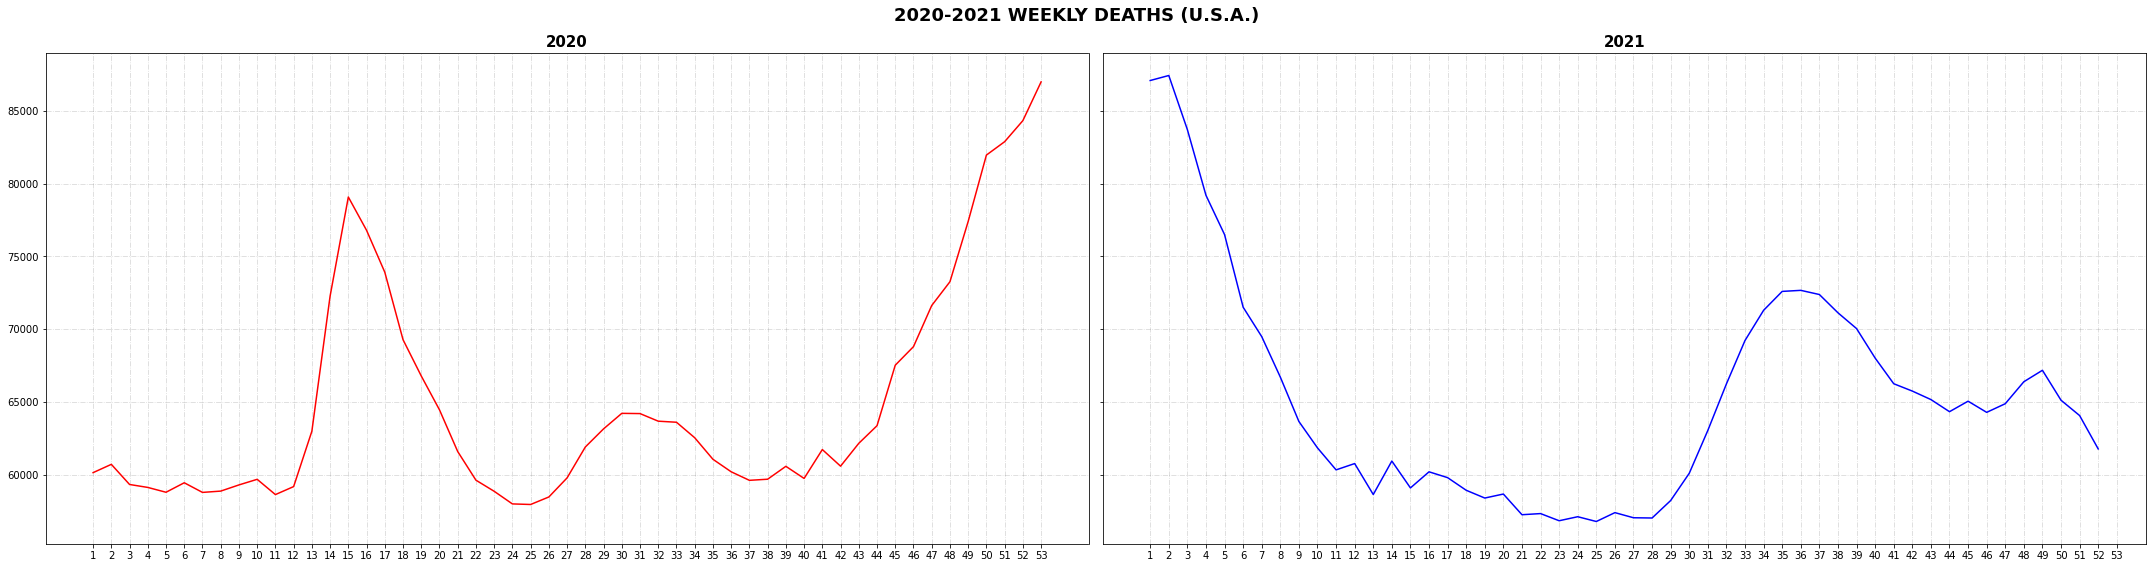

In [11]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(30, 8), sharey=True)

# Defunciones 2020:
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['All_Cause']
ax1.plot(x, y, label='2020', color='red')

# Title, grid, xticks, etc:
ax1.set_title('2020', fontweight='bold', fontsize=15)
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks([x for x in range(1, 54)])

# --------------------------------------------------------------------

# Defunciones 2021:
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['All_Cause']
ax2.plot(x, y, label='2021', color='blue')

# Title, grid, xticks, etc:
ax2.set_title('2021', fontweight='bold', fontsize=15)
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks([x for x in range(1, 54)])

# --------------------------------------------------------------------

plt.suptitle('2020-2021 WEEKLY DEATHS (U.S.A.)', fontweight='bold', fontsize=18)
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Vaya, pues al igual que en España, nos encontramos un pico muy llamativo coincidente con el inicio de la vacunación (que en Estados Unidos empezó a finales de 2020), aunque está claro que dicha ola comenzó algo antes. Lo extraño es que es la ola más grande de los 2 años, superando ampliamente al famoso pico de la pandemia.<br>
Vale, no podemos sacar conclusiones definitivas sobre eso, pero raro es.<br>
Y otra coincidencia con España es que hay otro pico muy importante entre julio y octubre de 2021 (cuando toda la población mayor y vulnerable estaba vacunada), pero el de Estados Unidos es mucho más pronunciado. Hemos de decir que en dicho país se comenzó a aplicar la tercera dosis a mediados de agosto (no así en España), lo que quizá pueda darnos una explicación a dicho fenómeno.<br>
¿Conclusión apresurada? Puede ser, pero ya hemos visto varias cosas que no cuadran en los datasets que llevamos analizados hasta ahora...

Hago otro gráfico comparativo de **2020** (en rojo) y **2021** (en azul), con la **cantidad de muertes por todas las causas** en cada año, esta vez superpuesto:

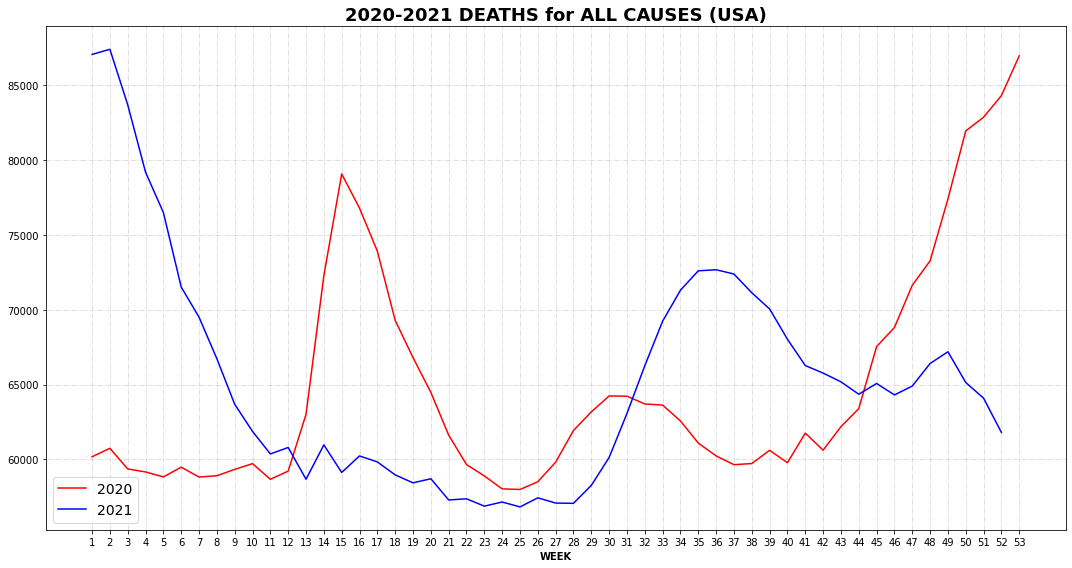

In [12]:
fig = plt.figure(figsize = (15, 8))

# Gráfico 2020:
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['All_Cause']
plt.plot(x, y, label='2020', color='red')

# Gráfico 2021:
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['All_Cause']
plt.plot(x, y, label='2021', color='blue')

plt.title('2020-2021 DEATHS for ALL CAUSES (USA)', fontweight='bold', fontsize=18)
plt.legend(fontsize=14, loc='lower left')
plt.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
plt.xticks([x for x in range(1, 54)])
plt.xlabel('WEEK', fontweight='bold')
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Sin duda, nos cuesta encontrar una explicación al enorme pico de principios de 2021, pero quizá debemos obviarlo, debido a que en esos meses en 2020 aun no estábamos en pandemia. Podría ser engañoso intentar rascar algo en ese tramo.<br>
Pero, lo que está claro es que el enorme pico de julio a octubre de 2021 (mucho mayor que el de España) no debería estar allí, con toda la población mayor y vulnerable vacunada.<br>
Discriminemos ahora por causas de fallecimiento, a ver que encontramos...

Hago un gráfico comparativo de **2020** (en rojo) y **2021** (en azul), con las **causas de fallecimiento más habituales** del dataset (**COVID19**, como causa múltiple o subyacente, **enfermedades del corazón** y **cáncer**):

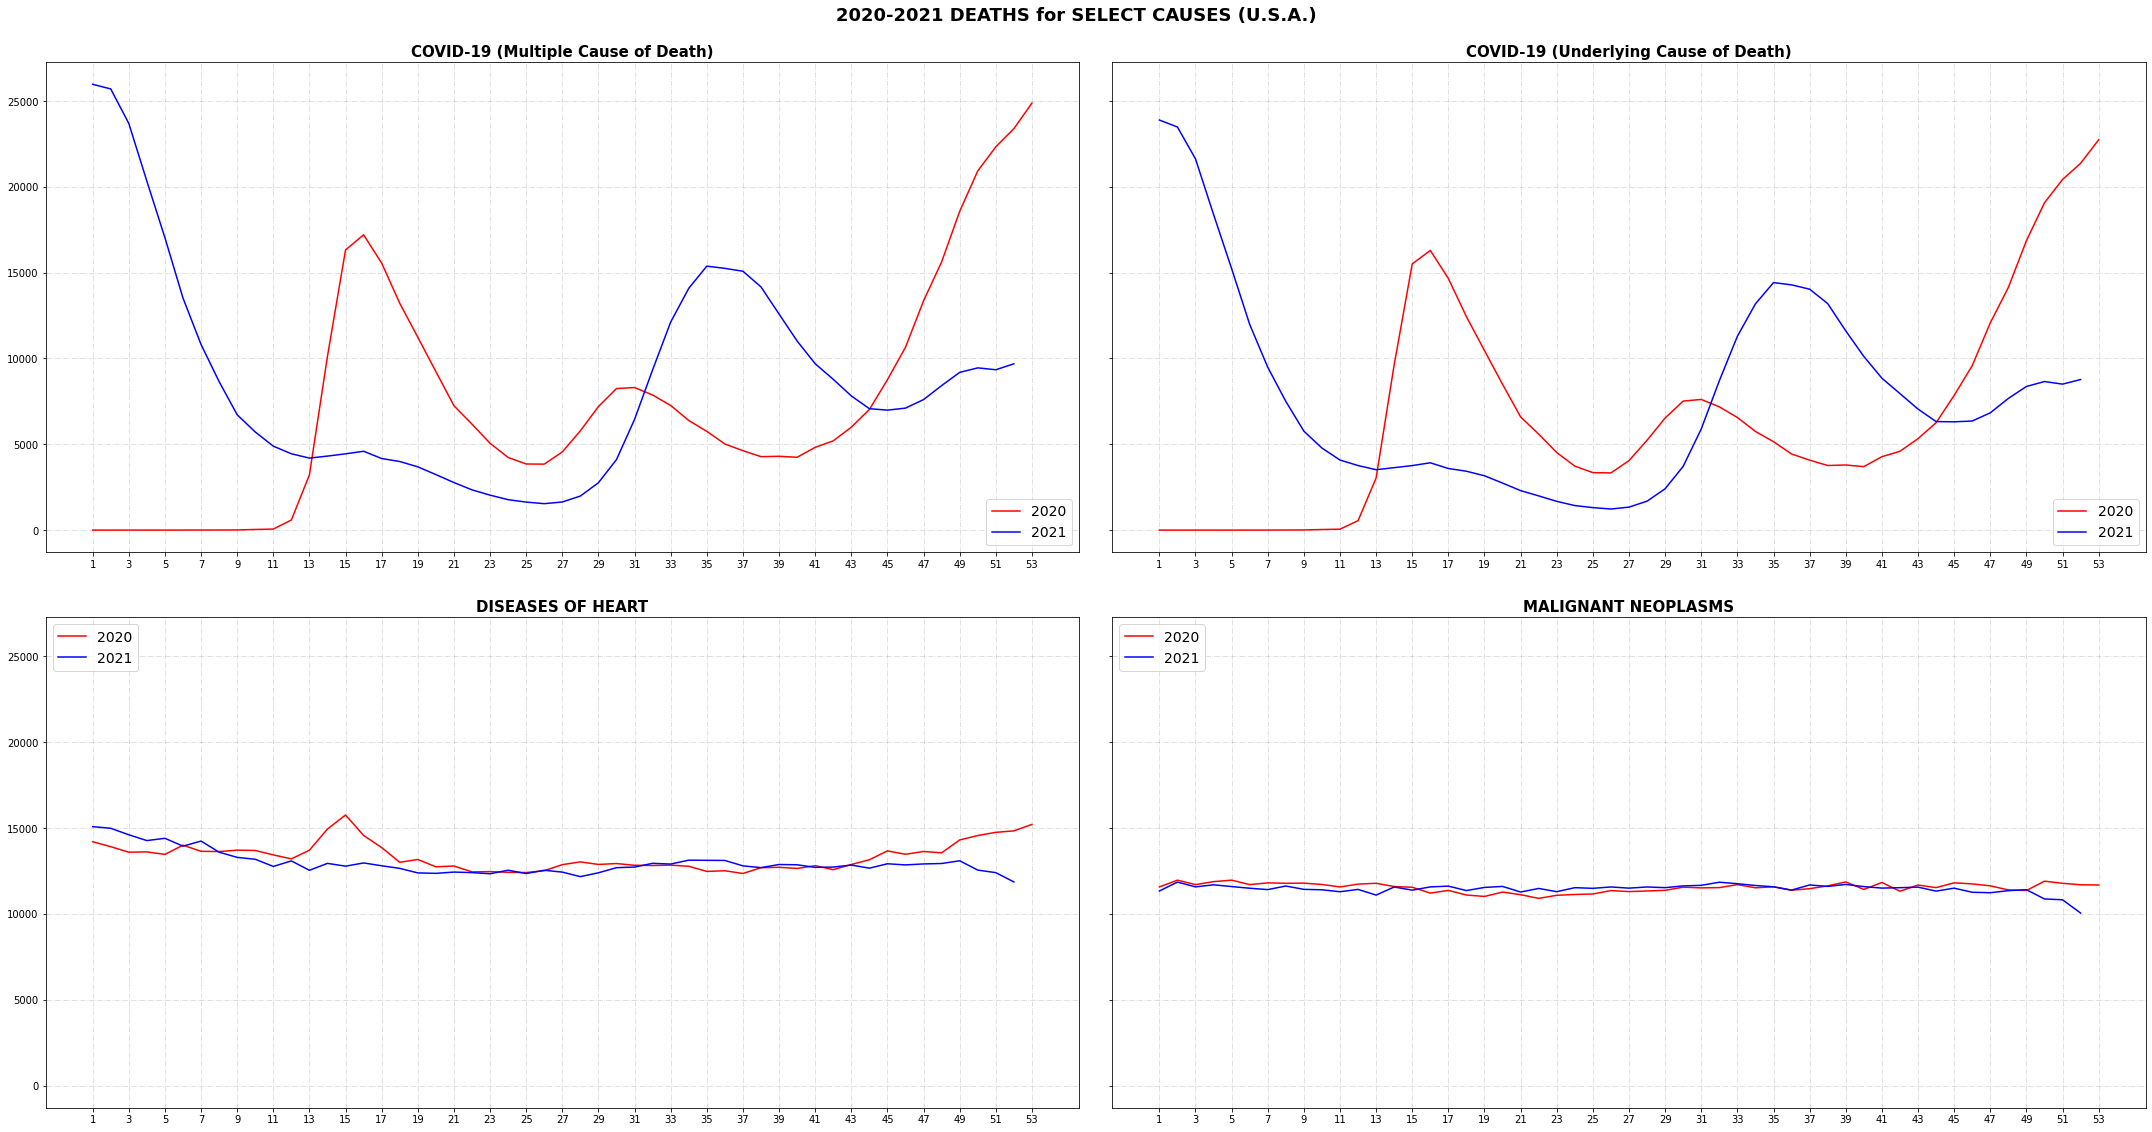

In [13]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 16), sharey=True)

# Gráfico 'COVID-19 (Multiple Cause of Death)':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['COVID-19_Multiple']
ax1.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['COVID-19_Multiple']
ax1.plot(x, y, label='2021', color='blue')
# -------------------
ax1.set_title('COVID-19 (Multiple Cause of Death)', fontweight='bold', fontsize=15)
ax1.legend(fontsize=14, loc='lower right')
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'COVID-19 (Underlying Cause of Death)':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['COVID-19_Underlying']
ax2.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['COVID-19_Underlying']
ax2.plot(x, y, label='2021', color='blue')
# -------------------
ax2.set_title('COVID-19 (Underlying Cause of Death)', fontweight='bold', fontsize=15)
ax2.legend(fontsize=14, loc='lower right')
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Diseases of Heart':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Heart_Diseases']
ax3.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Heart_Diseases']
ax3.plot(x, y, label='2021', color='blue')
# -------------------
ax3.set_title('DISEASES OF HEART', fontweight='bold', fontsize=15)
ax3.legend(fontsize=14, loc='upper left')
ax3.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax3.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Malignant Neoplasms':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Malignant_Neoplasms']
ax4.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Malignant_Neoplasms']
ax4.plot(x, y, label='2021', color='blue')
# -------------------
ax4.set_title('MALIGNANT NEOPLASMS', fontweight='bold', fontsize=15)
ax4.legend(fontsize=14, loc='upper left')
ax4.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax4.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

plt.suptitle('2020-2021 DEATHS for SELECT CAUSES (U.S.A.)\n ', fontweight='bold', fontsize=18)
plt.tight_layout(h_pad=3, w_pad=3);

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
No vemos nada reseñable en los fallecimientos por Cáncer, y no demasiado en los fallecimientos por Enfermedades del Corazón (aunque hay un pico modesto, coinicidente con el inicio de la vacunación, que nos llama a analizarlo por rangos de edad).<br>
En cuanto a los fallecimientos relacionados con la COVID-19 (que acapara la mayor cantidad de casos) nos pasa lo mismo que con el gráfico anterior (el de todas las causas): no encontramos explicación al enorme pico de julio a octubre de 2021, salvo que esté relacionado con la vacunación.

Hago un gráfico comparativo de **2020** (en rojo) y **2021** (en azul), con otras **causas de fallecimiento** reflejadas en el dataset (**menos habituales** que las del gráfico anterior):

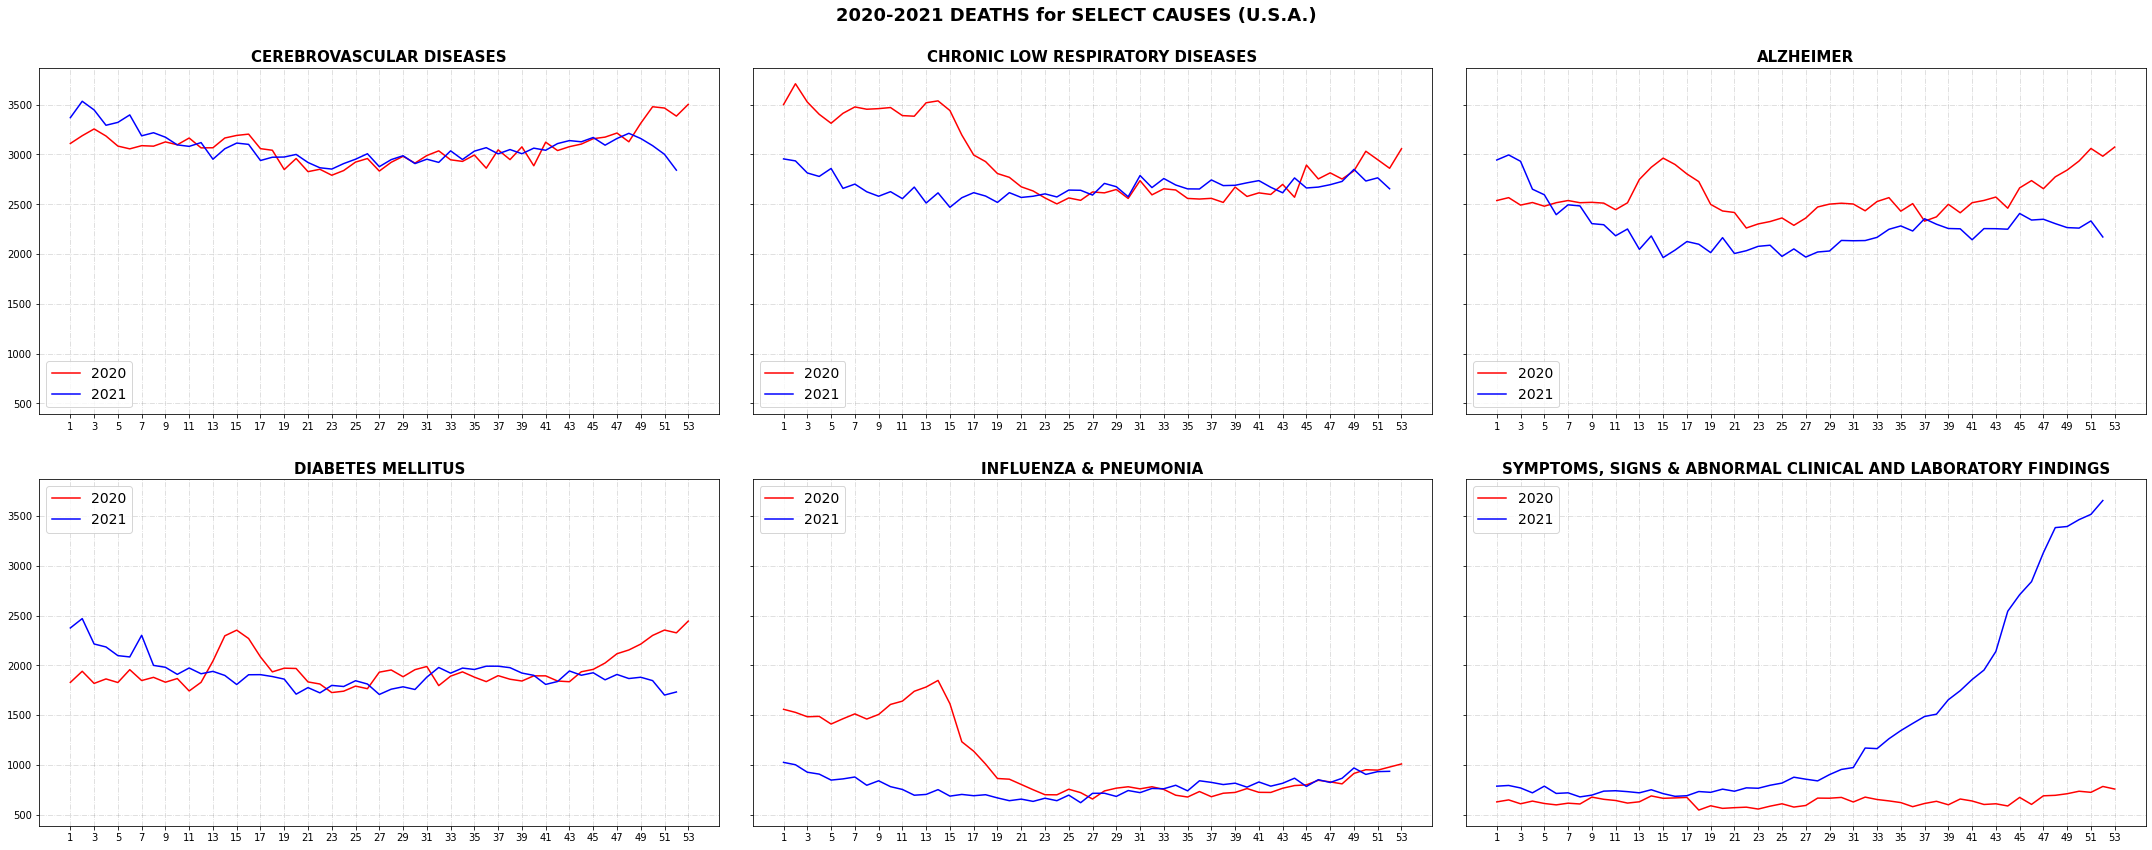

In [14]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(30, 12), sharey=True)

# Gráfico 'Cerebrovascular Diseases':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Cerebrovascular_Diseases']
ax1.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Cerebrovascular_Diseases']
ax1.plot(x, y, label='2021', color='blue')
# -------------------
ax1.set_title('CEREBROVASCULAR DISEASES', fontweight='bold', fontsize=15)
ax1.legend(fontsize=14, loc='lower left')
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Chronic Lower Respiratory Diseases':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Lower_Resp_Diseases']
ax2.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Lower_Resp_Diseases']
ax2.plot(x, y, label='2021', color='blue')
# -------------------
ax2.set_title('CHRONIC LOW RESPIRATORY DISEASES', fontweight='bold', fontsize=15)
ax2.legend(fontsize=14, loc='lower left')
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Alzheimer Disease':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Alzheimer']
ax3.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Alzheimer']
ax3.plot(x, y, label='2021', color='blue')
# -------------------
ax3.set_title('ALZHEIMER', fontweight='bold', fontsize=15)
ax3.legend(fontsize=14, loc='lower left')
ax3.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax3.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Diabetes Mellitus':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Diabetes_Mellitus']
ax4.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Diabetes_Mellitus']
ax4.plot(x, y, label='2021', color='blue')
# -------------------
ax4.set_title('DIABETES MELLITUS', fontweight='bold', fontsize=15)
ax4.legend(fontsize=14, loc='upper left')
ax4.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax4.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Influenza and Pneumonia':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Influenza_Pneumonia']
ax5.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Influenza_Pneumonia']
ax5.plot(x, y, label='2021', color='blue')
# -------------------
ax5.set_title('INFLUENZA & PNEUMONIA', fontweight='bold', fontsize=15)
ax5.legend(fontsize=14, loc='upper left')
ax5.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax5.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Abnormal_Symptoms']
ax6.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Abnormal_Symptoms']
ax6.plot(x, y, label='2021', color='blue')
# -------------------
ax6.set_title('SYMPTOMS, SIGNS & ABNORMAL CLINICAL AND LABORATORY FINDINGS', fontweight='bold', fontsize=15)
ax6.legend(fontsize=14, loc='upper left')
ax6.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax6.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

plt.suptitle('2020-2021 DEATHS for SELECT CAUSES (U.S.A.)\n ', fontweight='bold', fontsize=18)
plt.tight_layout(h_pad=3, w_pad=3);

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Como en el gráfico anterior, no encontramos nada interesante en la mayoría de las causas de fallecimiento de éste gráfico, aunque los fallecimientos por Enfermedades Cerebrovasculares y por Diabetes Mellitus también tienen un pico coincidente con el inicio de la vacunación (que analizaremos por rangos de edad en el próximo notebook).<br>
Pero la sorpresa nos llega con la causa "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified". Su propia descripción da escalofríos, al menos a mí, y sin decir nada concreto, parece que lo dice todo. Está claro que algo ha pasado en 2021 para que dicha causa de fallecimiento se disparara de esa manera, y a mí solo se me ocurre una explicación.<br>
Demos, pues, un último paso, para ahondar un poco más en los misterios con los que nos hemos topado en este dataset...

---